In [98]:
import models
import numpy as np
from skimage.io import imread_collection
import torch
import glob
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
from math import floor
import torch.optim as optim
from importlib import reload
reload(models)

<module 'models' from 'C:\\Users\\ifili\\MMP_MSU\\for samsung\\models.py'>

In [21]:
data = np.zeros((1000, 32, 32, 3))
Y = np.zeros(1000, dtype=np.int)
clocks = np.array(imread_collection(glob.glob("./clocks_crocodiles/clock/*.png")))
crocks = np.array(imread_collection(glob.glob("./clocks_crocodiles/crocodile/*.png")))
data[0:500, ...] = clocks
data[500:, ...] = crocks
Y[0:500] = 1
ind = np.random.permutation(1000)
data = data[ind, ...]
Y = Y[ind]
data = (data -127.5)/127.5
data = np.transpose(data, axes=(0,3,1,2))
train_set = torch.Tensor(data)
train_y = torch.Tensor(Y)
train = torch.utils.data.TensorDataset(train_set, train_y)
trainloader = torch.utils.data.DataLoader(train, batch_size=4,
                                         shuffle=False, num_workers=2)

In [103]:
loss = []
time = []
for conv in range(5,43,3):
    autoenc = models.ConvAutoEncoder(input_size=(3, 32, 32), layers_num=2, conv_out_channels=(conv, conv),
                                  conv_kernel_size=(3, 5), conv_stride=(1,2),
                                  pool_kernel_size=(2, 2))
    criterion = nn.MSELoss()
    optimizer = optim.SGD(autoenc.parameters(), lr=0.001, weight_decay=1e-3, momentum=0.9)
    t, a = models.fit_autoenc(autoenc, train, optimizer, criterion, epoch=10)
    loss.append(models.loss_autoenc(autoenc, trainloader, criterion))
    time.append(t)

C:\Users\ifili\AppData\Local\conda\conda\envs\torch\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


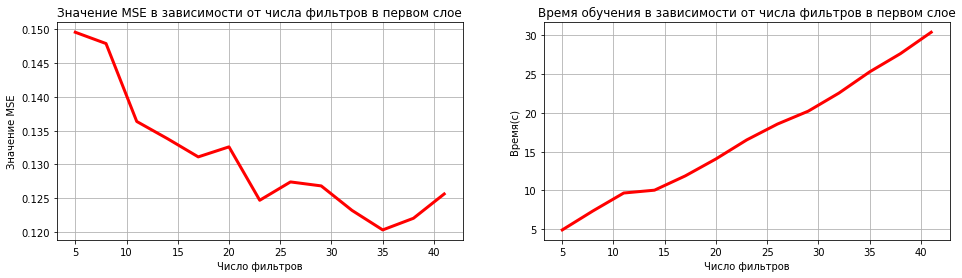

In [104]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(16,4))
ax1.plot(list(range(5,43,3)), loss, 'r', lw=3)
ax1.set_title(u"Значение MSE в зависимости от числа фильтров в первом слое")
ax1.set_ylabel(u"Значение MSE")
ax1.set_xlabel(u"Число фильтров")
ax1.grid()
ax2.plot(list(range(5,43,3)), time, 'r', lw=3)
ax2.set_title(u"Время обучения в зависимости от числа фильтров в первом слое")
ax2.set_ylabel(u"Время(с)")
ax2.set_xlabel(u"Число фильтров")
ax2.grid()
f.show()  

In [105]:
loss = []
time = []
for conv in range(5,43,3):
    autoenc = models.ConvAutoEncoder(input_size=(3, 32, 32), layers_num=2, conv_out_channels=(35, conv),
                                  conv_kernel_size=(4, 6), conv_stride=(1,2),
                                  pool_kernel_size=(2, 2))
    criterion = nn.MSELoss()
    optimizer = optim.SGD(autoenc.parameters(), lr=0.001, weight_decay=1e-3, momentum=0.9)
    t, a = models.fit_autoenc(autoenc, train, optimizer, criterion, epoch=10)
    loss.append(models.loss_autoenc(autoenc, trainloader, criterion))
    time.append(t)

C:\Users\ifili\AppData\Local\conda\conda\envs\torch\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


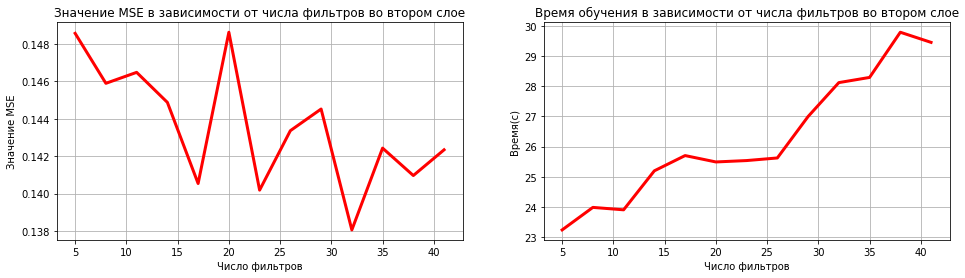

In [106]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(16,4))
ax1.plot(list(range(5,43,3)), loss, 'r', lw=3)
ax1.set_title(u"Значение MSE в зависимости от числа фильтров во втором слое")
ax1.set_ylabel(u"Значение MSE")
ax1.set_xlabel(u"Число фильтров")
ax1.grid()
ax2.plot(list(range(5,43,3)), time, 'r', lw=3)
ax2.set_title(u"Время обучения в зависимости от числа фильтров во втором слое")
ax2.set_ylabel(u"Время(с)")
ax2.set_xlabel(u"Число фильтров")
ax2.grid()
f.show() 